<a href="https://colab.research.google.com/github/C4st3ll4n/google_colab/blob/master/predicao_petr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
base = pd.read_csv('PETR4.SA (2).csv')

In [0]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,21.510000,22.120001,21.260000,21.730000,19.086035,20391300.0
1,2012-01-03,21.830000,22.410000,21.809999,22.410000,19.683296,22940500.0
2,2012-01-04,22.180000,22.580000,21.980000,22.570000,19.823830,18736900.0
3,2012-01-05,22.389999,22.610001,22.150000,22.309999,19.595463,19489000.0
4,2012-01-06,22.469999,22.580000,22.250000,22.330000,19.613029,13941000.0


In [0]:
base = base.dropna()

In [0]:
base = base.iloc[:,1].values

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

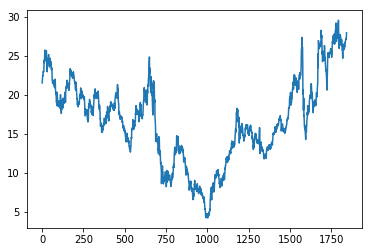

In [0]:
plt.plot(base)

In [0]:
periodo = 30
previsao_futura = 1

In [0]:
x = base[0:(len(base) - len(base)%periodo)]

In [0]:
(len(base) - len(base)%periodo)

1830

In [0]:
x_batches = x.reshape(-1, periodo, 1)

In [0]:
x_batches

array([[[21.51    ],
        [21.83    ],
        [22.18    ],
        ...,
        [24.24    ],
        [24.360001],
        [23.49    ]],

       [[22.950001],
        [24.1     ],
        [23.68    ],
        ...,
        [23.5     ],
        [23.280001],
        [23.219999]],

       [[22.26    ],
        [21.82    ],
        [21.76    ],
        ...,
        [19.      ],
        [19.27    ],
        [19.440001]],

       ...,

       [[25.26    ],
        [25.33    ],
        [25.4     ],
        ...,
        [27.139999],
        [26.549999],
        [26.799999]],

       [[26.49    ],
        [27.02    ],
        [27.790001],
        ...,
        [25.950001],
        [27.120001],
        [27.360001]],

       [[27.690001],
        [27.719999],
        [27.719999],
        ...,
        [26.51    ],
        [25.790001],
        [25.879999]]])

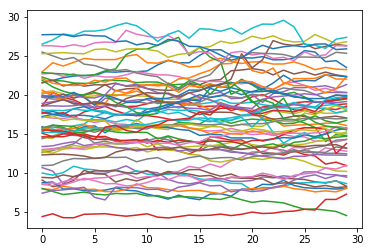

In [0]:
for i, b in enumerate(x_batches):
    plt.plot(b)

In [0]:
y = base[1:(len(base) - len(base)%periodo)+previsao_futura]

In [0]:
y

array([21.83    , 22.18    , 22.389999, ..., 25.790001, 25.879999,
       26.290001])

In [0]:
(len(base) - len(base)%periodo)+previsao_futura

1831

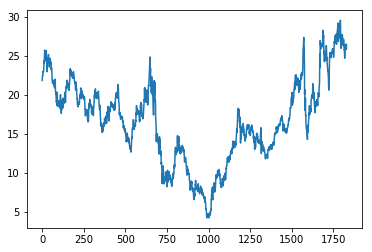

In [0]:
plt.plot(y)

In [0]:
y_batches = y.reshape(-1,periodo, 1 )

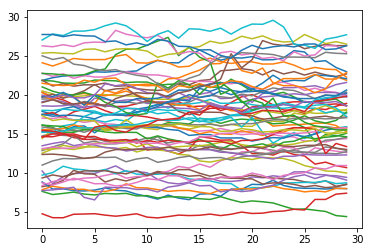

In [0]:
for i, b in enumerate(y_batches):
    plt.plot(b)

In [0]:
x_teste = base[-(periodo + previsao_futura):]

In [0]:
-(periodo + previsao_futura)


-31

In [0]:
periodo + previsao_futura

31

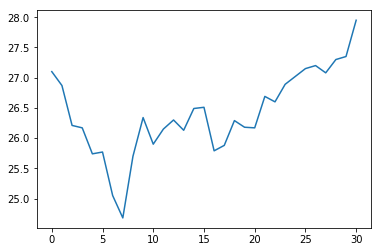

In [0]:
plt.plot(x_teste)

In [0]:
x_teste = x_teste[:periodo]

In [0]:
x_teste = x_teste.reshape(-1, periodo, 1)

In [0]:
y_teste = base[-(periodo):]

In [0]:
y_teste = y_teste.reshape(-1, periodo, 1)

In [0]:
#plt.plot(y_teste)

In [0]:
import tensorflow as tf
tf.reset_default_graph()

In [0]:
entradas = 1

In [0]:
neuronios_oculta = 100

In [0]:
neuronios_saida = 1

In [0]:
xph = tf.placeholder(tf.float32, [None, periodo, entradas])

In [0]:
yph = tf.placeholder(tf.float32, [None, periodo, neuronios_saida])

In [0]:
#celula = tf.contrib.rnn.BasicRNNCell(num_units=neuronios_oculta, activation=tf.nn.relu)
#celula = tf.contrib.rnn.LSTMCell(num_units=neuronios_oculta, activation=tf.nn.relu)
#celula = tf.contrib.rnn.OutputProjectionWrapper(celula, 1)

In [0]:
def cria_uma_celula():
    return tf.contrib.rnn.LSTMCell(num_units=neuronios_oculta, activation=tf.nn.relu)

In [0]:
def cria_varias_celulas():
    celulas = tf.nn.rnn_cell.MultiRNNCell([cria_uma_celula() for i in range(4)], )
    return tf.contrib.rnn.DropoutWrapper(celulas, output_keep_prob = 0.3)

In [0]:
celula = cria_varias_celulas()
celula = tf.contrib.rnn.OutputProjectionWrapper(celula, output_size=1)

W0905 00:37:53.036350 140545346877312 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0905 00:37:53.038335 140545346877312 deprecation.py:323] From <ipython-input-36-3dacdd18e2d7>:2: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0905 00:37:53.043613 140545346877312 deprecation.py:323] From <ipython-input-37-f0fd53c7767b>:2: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for 

In [0]:
saida_rnn, _ = tf.nn.dynamic_rnn(celula, xph, dtype=tf.float32)

W0905 00:37:53.061779 140545346877312 deprecation.py:323] From <ipython-input-39-0cc5dc115720>:1: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0905 00:37:53.578873 140545346877312 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0905 00:37:53.592837 140545346877312 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn_cell_impl.py:961: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call init

In [0]:
erro = tf.losses.mean_squared_error(labels=yph, predictions=saida_rnn)

W0905 00:37:54.395811 140545346877312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
otimizador = tf.train.AdamOptimizer()

In [0]:
treinamento = otimizador.minimize(erro)

In [0]:
with tf.Session() as sessao:
    sessao.run(tf.global_variables_initializer())

    for epoca in range(3001):
        _,custo = sessao.run([treinamento, erro], feed_dict={xph:x_batches, yph:y_batches})
        if epoca % 100 == 0:
            print("Epoca:{}\nCusto:{}\n\n".format(epoca, custo))

    previsoes = sessao.run(saida_rnn,feed_dict={xph:x_teste} )

Epoca:0
Custo:307.7337341308594


Epoca:100
Custo:33.633628845214844


Epoca:200
Custo:18.78183364868164


Epoca:300
Custo:16.828697204589844


Epoca:400
Custo:14.621050834655762


Epoca:500
Custo:15.230594635009766


Epoca:600
Custo:14.537459373474121


Epoca:700
Custo:14.032852172851562


Epoca:800
Custo:13.092196464538574


Epoca:900
Custo:13.352336883544922


Epoca:1000
Custo:12.817995071411133


Epoca:1100
Custo:13.409369468688965


Epoca:1200
Custo:12.503144264221191


Epoca:1300
Custo:13.557604789733887


Epoca:1400
Custo:13.831338882446289


Epoca:1500
Custo:12.99182415008545


Epoca:1600
Custo:12.341853141784668


Epoca:1700
Custo:12.523069381713867


Epoca:1800
Custo:12.31224536895752


Epoca:1900
Custo:12.26904010772705


Epoca:2000
Custo:12.009512901306152


Epoca:2100
Custo:12.723444938659668


Epoca:2200
Custo:12.218297004699707


Epoca:2300
Custo:12.086252212524414


Epoca:2400
Custo:12.180303573608398


Epoca:2500
Custo:11.787677764892578


Epoca:2600
Custo:12.618877410

In [0]:
import numpy as np

In [0]:
y_teste2 = np.ravel(y_teste)

In [0]:
y_teste2

array([26.870001, 26.209999, 26.17    , 25.74    , 25.77    , 25.049999,
       24.68    , 25.700001, 26.34    , 25.9     , 26.15    , 26.299999,
       26.129999, 26.49    , 26.51    , 25.790001, 25.879999, 26.290001,
       26.18    , 26.17    , 26.690001, 26.6     , 26.889999, 27.02    ,
       27.15    , 27.200001, 27.08    , 27.299999, 27.35    , 27.950001])

In [0]:
previsoes2 = np.ravel(previsoes)

In [0]:
previsoes2

array([26.02667 , 20.241734, 31.633934, 32.152134, 28.424603, 19.80079 ,
       21.698597, 25.624855, 22.450468, 30.791945, 24.778252, 26.778809,
       15.028049, 20.066797, 23.013063, 42.501354, 22.541496, 19.727547,
       25.015512, 22.56351 , 27.565102, 28.287508, 26.684399, 28.513285,
       25.04345 , 30.038342, 30.318323, 30.031664, 18.505682, 19.597063],
      dtype=float32)

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
mae = mean_absolute_error(y_teste2, previsoes2)
mse = mean_squared_error(y_teste2, previsoes2)

In [0]:
mae

4.168635418664551

In [0]:
mse

30.029068022219334

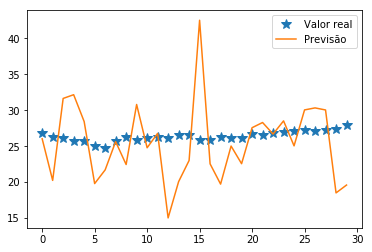

In [0]:
plt.plot(y_teste2, '*', markersize=10, label="Valor real")
plt.plot(previsoes2, '-', markersize=5, label="Previsão")
plt.legend()

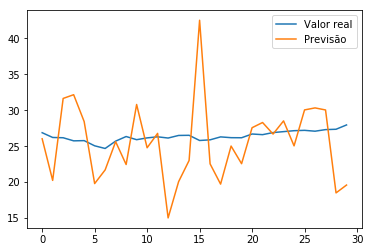

In [0]:
plt.plot(y_teste2, markersize=10, label="Valor real")
plt.plot(previsoes2, markersize=10, label="Previsão")
plt.legend()